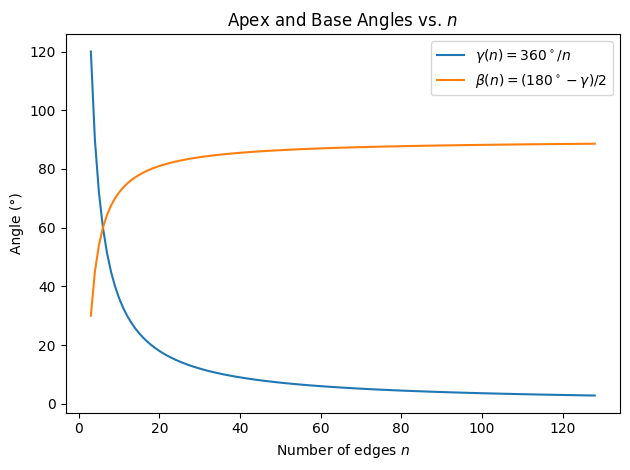

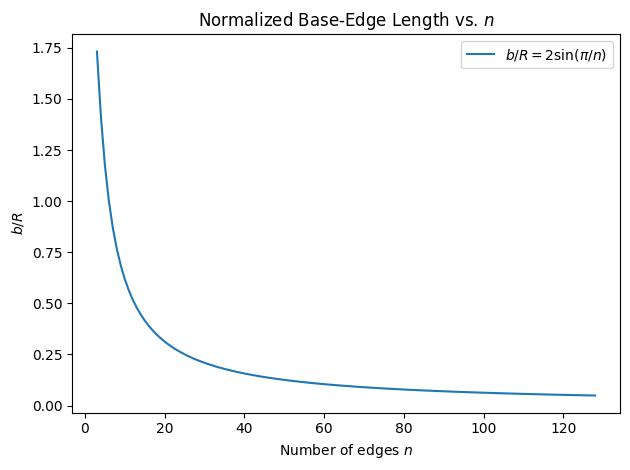

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter sweep
n = np.arange(3, 129)
gamma = 360.0 / n                    # apex angle in degrees
beta = (180.0 - gamma) / 2.0         # base angles in degrees
b_norm = 2.0 * np.sin(np.pi / n)     # chord length normalized by R

# Plot apex and base angles
plt.figure()
plt.plot(n, gamma, label=r'$\gamma(n)=360^\circ/n$')
plt.plot(n, beta,  label=r'$\beta(n)=(180^\circ-\gamma)/2$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Apex and Base Angles vs. $n$')
plt.legend()
plt.tight_layout()

# Plot normalized base‐edge length
plt.figure()
plt.plot(n, b_norm, label=r'$b/R = 2\sin(\pi/n)$')
plt.xlabel('Number of edges $n$')
plt.ylabel(r'$b/R$')
plt.title('Normalized Base‐Edge Length vs. $n$')
plt.legend()
plt.tight_layout()

plt.show()


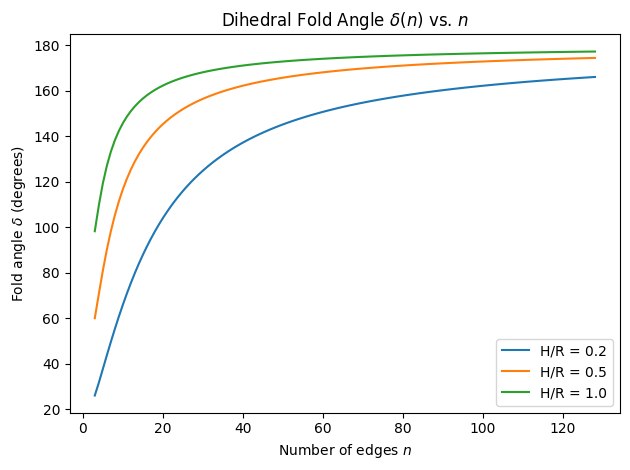

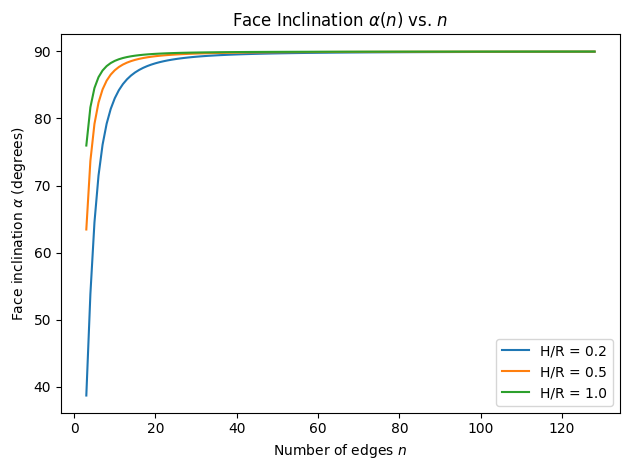

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter sweep
n = np.arange(3, 129)
H_over_R_values = [0.2, 0.5, 1.0]

# Compute δ(n) and α(n) for each H/R
delta_deg = {h: 2 * np.degrees(np.arctan(h / np.sin(np.pi / n))) for h in H_over_R_values}
alpha_deg = {h: np.degrees(np.arctan((2 * h) / (1 - np.cos(np.pi / n)))) for h in H_over_R_values}

# Plot dihedral (fold) angle δ(n)
plt.figure()
for h, d in delta_deg.items():
    plt.plot(n, d, label=f'H/R = {h}')
plt.xlabel('Number of edges $n$')
plt.ylabel('Fold angle $\\delta$ (degrees)')
plt.title('Dihedral Fold Angle $\\delta(n)$ vs. $n$')
plt.legend()
plt.tight_layout()

# Plot face inclination α(n)
plt.figure()
for h, a in alpha_deg.items():
    plt.plot(n, a, label=f'H/R = {h}')
plt.xlabel('Number of edges $n$')
plt.ylabel('Face inclination $\\alpha$ (degrees)')
plt.title('Face Inclination $\\alpha(n)$ vs. $n$')
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def plot_spike(n=32, H_over_R=0.5, R=1.0):
    # Compute parameters
    theta = 2 * np.pi / n           # apex angle in radians
    gamma = theta                    # apex angle
    beta = (np.pi - theta) / 2       # base angles
    b = 2 * R * np.sin(np.pi / n)    # chord length
    H = H_over_R * R                 # spike height
    phi = np.arctan2(H, b/2)         # face inclination above horizontal
    delta = 2 * phi                  # dihedral fold angle

    # Set up plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: base circle with chord b
    t = np.linspace(0, 2*np.pi, 400)
    ax1.plot(R*np.cos(t), R*np.sin(t), color='gray')
    A = np.array([R*np.cos(-theta/2), R*np.sin(-theta/2)])
    B = np.array([R*np.cos( theta/2), R*np.sin( theta/2)])
    ax1.plot([A[0], B[0]], [A[1], B[1]], 'k-', lw=2)
    ax1.scatter([A[0], B[0]], [A[1], B[1]], color='red')
    ax1.set_aspect('equal')
    ax1.set_title('Regular $n$-gon Edge & Radius')
    ax1.annotate('$R$', xy=(R,0), xytext=(10,-10), textcoords='offset points')
    mid = (A + B) / 2
    ax1.annotate('$b$', xy=mid, xytext=(0,10), ha='center')
    ax1.set_xticks([]); ax1.set_yticks([])

    # Plot 2: cross-section triangle
    # Coordinates: A2, B2 on horizontal, C2 above midpoint
    A2 = np.array([-b/2, 0])
    B2 = np.array([ b/2, 0])
    C2 = np.array([0, H])
    ax2.plot([A2[0], B2[0], C2[0], A2[0]],
             [A2[1], B2[1], C2[1], A2[1]], 'k-')
    ax2.scatter([A2[0], B2[0], C2[0]], [A2[1], B2[1], C2[1]], color='red')
    ax2.set_aspect('equal')
    ax2.set_title('Spike Cross-Section')

    # Annotate angles
    # Apex gamma
    ax2.annotate('', xy=(0,0.05*H), xytext=(b/20, H - H/20),
                  arrowprops=dict(arrowstyle='-|>', lw=1))
    ax2.text(0, H*0.5, r'$\gamma=' + f'{np.degrees(gamma):.1f}°$', ha='left')
    # Base beta at A2
    ax2.text(A2[0], -0.05*H, r'$\beta=' + f'{np.degrees(beta):.1f}°$', ha='right')
    # Height H
    ax2.annotate('', xy=(0,0), xytext=(0,H),
                  arrowprops=dict(arrowstyle='<->', lw=1))
    ax2.text(0, H/2, r'$H$', ha='right', va='center')
    # Face inclination phi
    ax2.annotate('', xy=(0,0), xytext=(np.cos(phi), np.sin(phi)),
                  arrowprops=dict(arrowstyle='->', lw=1))
    ax2.text(np.cos(phi)/2, np.sin(phi)/2 + 0.02,
             r'$\phi=' + f'{np.degrees(phi):.1f}°$', ha='left')

    ax2.set_xticks([]); ax2.set_yticks([])

    # Print numeric values below
    info = (f"n = {n},  R = {R:.2f}, H/R = {H_over_R:.2f}\n"
            f"γ (apex) = {np.degrees(gamma):.2f}°,  "
            f"β (base) = {np.degrees(beta):.2f}°\n"
            f"b/R = {b/R:.3f},  δ (fold) = {np.degrees(delta):.2f}°,  φ (incl.) = {np.degrees(phi):.2f}°")
    fig.text(0.5, -0.02, info, ha='center', fontsize=12)
    plt.show()

# Interactive sliders
interact(plot_spike,
         n=IntSlider(min=3, max=128, step=1, value=32, description='n'),
         H_over_R=FloatSlider(min=0.1, max=2.0, step=0.05, value=0.5, description='H/R'),
         R=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='R'));



interactive(children=(IntSlider(value=32, description='n', max=128, min=3), FloatSlider(value=0.5, description…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def plot_spike(n=32, H_over_R=0.5, R=1.0):
    theta = 2 * np.pi / n
    gamma = theta
    beta = (np.pi - theta) / 2
    b = 2 * R * np.sin(np.pi / n)
    H = H_over_R * R
    phi = np.arctan2(H, b/2)
    delta = 2 * phi

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Top view: circle + chord b
    t = np.linspace(0, 2*np.pi, 400)
    ax1.plot(R*np.cos(t), R*np.sin(t), color='gray')
    A = np.array([R*np.cos(-theta/2), R*np.sin(-theta/2)])
    B = np.array([R*np.cos( theta/2), R*np.sin( theta/2)])
    ax1.plot([A[0], B[0]], [A[1], B[1]], 'k-', lw=2)
    ax1.scatter([A[0], B[0]], [A[1], B[1]], color='red')
    ax1.set_aspect('equal')
    ax1.set_title('Top view: $n$‑gon edge & radius')
    ax1.annotate('$R$', xy=(R,0), xytext=(10,-10), textcoords='offset points')
    mid = (A + B) / 2
    ax1.annotate('$b$', xy=mid, xytext=(0,10), ha='center')
    ax1.set_xticks([]); ax1.set_yticks([])

    # Side view: cross‑section triangle
    A2 = np.array([-b/2, 0])
    B2 = np.array([ b/2, 0])
    C2 = np.array([0, H])
    ax2.plot([A2[0], B2[0], C2[0], A2[0]],
             [A2[1], B2[1], C2[1], A2[1]], 'k-')
    ax2.scatter([A2[0], B2[0], C2[0]], [A2[1], B2[1], C2[1]], color='red')
    ax2.set_aspect('equal')
    ax2.set_title('Side view: spike cross‑section')

    # Annotate gamma at C2
    ax2.text(0.05*b, H*0.8, r'$\gamma=' + f'{np.degrees(gamma):.1f}°$', color='blue')
    # Annotate beta at A2
    ax2.text(A2[0], -0.05*R, r'$\beta=' + f'{np.degrees(beta):.1f}°$', ha='right', color='blue')
    # Annotate height H
    ax2.annotate('', xy=(0,0), xytext=(0,H),
                 arrowprops=dict(arrowstyle='<->'))
    ax2.text(-0.05*R, H/2, r'$H$', va='center', color='green')
    # Annotate face inclination φ
    ax2.annotate('', xy=(0,0), xytext=(np.cos(phi), np.sin(phi)),
                 arrowprops=dict(arrowstyle='->'))
    ax2.text(np.cos(phi)/2, np.sin(phi)/2 + 0.02,
             r'$\phi=' + f'{np.degrees(phi):.1f}°$', color='magenta')
    ax2.set_xticks([]); ax2.set_yticks([])

    # Summary text
    info = (f"n={n}, R={R:.2f}, H/R={H_over_R:.2f} | "
            f"γ={np.degrees(gamma):.2f}°, β={np.degrees(beta):.2f}°, "
            f"b/R={b/R:.3f}, δ={np.degrees(delta):.2f}°, φ={np.degrees(phi):.2f}°")
    fig.text(0.5, -0.02, info, ha='center', fontsize=12)
    plt.show()

interact(plot_spike,
         n=IntSlider(min=3, max=128, step=1, value=32, description='n'),
         H_over_R=FloatSlider(min=0.1, max=2.0, step=0.05, value=0.5, description='H/R'),
         R=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='R'));


interactive(children=(IntSlider(value=32, description='n', max=128, min=3), FloatSlider(value=0.5, description…

In [ ]:
# ▶︎ Paste this entire block into a Colab notebook cell and run.

!pip install plotly ipywidgets

import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, HTML

# 1) A little static 2D schematic you can tuck in a corner:
static_schematic = """
<svg width="200" height="200" style="background:#fff">
  <!-- Outer circle (radius R) -->
  <circle cx="100" cy="100" r="60" stroke="gray" fill="none" stroke-width="2"/>
  <!-- One chord b -->
  <line x1="100" y1="40" x2="150" y2="100" stroke="black"/>
  <text x="125" y="85" font-size="12">b</text>
  <!-- One spike H -->
  <line x1="100" y1="40" x2="100" y2="0" stroke="black"/>
  <text x="105" y="20" font-size="12">H</text>
  <!-- Angle γ at tip -->
  <path d="M98,2 A2,2 0 0,1 102,2" fill="none" stroke="blue"/>
  <text x="104" y="10" font-size="12" fill="blue">γ</text>
  <!-- Base angle β -->
  <path d="M100,100 L100,40 L150,100" fill="none" stroke="red"/>
  <text x="110" y="70" font-size="12" fill="red">β</text>
</svg>
"""

display(HTML(static_schematic))

# 2) Function to build & return a Plotly Mesh3d for the 3D “shuriken”
def make_shuriken(n, Hr, R):
    θ = 2*np.pi/n
    H = Hr * R
    verts = []
    faces = []
    for k in range(n):
        φk = 2*np.pi*k/n
        # base endpoints
        A = [R*np.cos(φk - θ/2), R*np.sin(φk - θ/2), 0]
        B = [R*np.cos(φk + θ/2), R*np.sin(φk + θ/2), 0]
        C = [R*np.cos(φk        ), R*np.sin(φk        ), H]
        idx = len(verts)
        verts += [A, B, C]
        faces.append([idx, idx+1, idx+2])
    verts = np.array(verts)
    i,j,k = np.array(faces).T
    mesh = go.Mesh3d(
        x=verts[:,0], y=verts[:,1], z=verts[:,2],
        i=i, j=j, k=k,
        color='lightgray', opacity=1.0,
        flatshading=True
    )
    fig = go.Figure(mesh)
    fig.update_layout(
        scene=dict(
            aspectmode='data',
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)),
        margin=dict(l=0,r=0,b=0,t=0)
    )
    return fig

# 3) Sliders and display
n_slider   = widgets.IntSlider(  value=32, min=3,   max=128, step=1,   description='n')
Hr_slider  = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.05, description='H/R')
R_slider   = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='R')

ui = widgets.HBox([n_slider, Hr_slider, R_slider])
out = widgets.Output()

def update(_):
    with out:
        out.clear_output(wait=True)
        fig = make_shuriken(n_slider.value, Hr_slider.value, R_slider.value)
        fig.show()

for w in (n_slider, Hr_slider, R_slider):
    w.observe(update, names='value')

display(ui, out)
# Trigger initial draw
update(None)


Output()

In [ ]:
# 1) Make sure ipywidgets is installed & enabled
!pip install -q ipywidgets plotly

In [ ]:
%load_ext widgetsnbextension
%widgets nbextension enable --py --sys-prefix widgetsnbextension

import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, HTML

# 2) Static inset schematic
svg = """
<svg width="150" height="150" style="position:absolute; top:10px; left:10px; z-index:10;
            border:1px solid #ccc; background:#fff">
  <circle cx="75" cy="75" r="40" stroke="gray" fill="none" stroke-width="2"/>
  <line x1="75" y1="35" x2="115" y2="75" stroke="black"/>
  <text x="95" y="70" font-size="12">b</text>
  <line x1="75" y1="35" x2="75"  y2="5"  stroke="black"/>
  <text x="78" y="20" font-size="12">H</text>
  <path d="M73,7 A2,2 0 0,1 77,7" fill="none" stroke="blue"/>
  <text x="80" y="15" font-size="12" fill="blue">γ</text>
  <path d="M75,75 L75,35 L115,75" fill="none" stroke="red"/>
  <text x="85" y="55" font-size="12" fill="red">β</text>
</svg>
"""
display(HTML(svg))

# 3) Mesh builder
def make_shuriken_mesh(n, Hr, R):
    θ = 2*np.pi/n
    H = Hr*R
    verts = []
    faces = []
    for k in range(n):
        φk = 2*np.pi*k/n
        A = [R*np.cos(φk-θ/2), R*np.sin(φk-θ/2), 0]
        B = [R*np.cos(φk+θ/2), R*np.sin(φk+θ/2), 0]
        C = [R*np.cos(φk    ), R*np.sin(φk    ), H]
        idx = len(verts)
        verts += [A,B,C]
        faces.append([idx, idx+1, idx+2])
    V = np.array(verts)
    I,J,K = np.array(faces).T
    return V, I, J, K

# 4) Create a FigureWidget
fig = go.FigureWidget()
V,I,J,K = make_shuriken_mesh(32, 0.5, 1.0)
mesh = go.Mesh3d(x=V[:,0], y=V[:,1], z=V[:,2],
                 i=I, j=J, k=K,
                 color='lightgray', flatshading=True)
fig.add_trace(mesh)
fig.update_layout(
    scene=dict(aspectmode='data',
               xaxis=dict(visible=False),
               yaxis=dict(visible=False),
               zaxis=dict(visible=False)),
    margin=dict(l=0,r=0,b=0,t=0),
)

# 5) Sliders
n_slider  = widgets.IntSlider(  value=32, min=3,   max=128, step=1,   description='n')
Hr_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.05, description='H/R')
R_slider  = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1,  description='R')

def update_plot(change):
    V,I,J,K = make_shuriken_mesh(n_slider.value, Hr_slider.value, R_slider.value)
    with fig.batch_update():
        fig.data[0].x = V[:,0]
        fig.data[0].y = V[:,1]
        fig.data[0].z = V[:,2]
        fig.data[0].i = I
        fig.data[0].j = J
        fig.data[0].k = K

for w in (n_slider, Hr_slider, R_slider):
    w.observe(update_plot, names='value')

# 6) Display
display(widgets.VBox([widgets.HBox([n_slider, Hr_slider, R_slider]), fig]))


The widgetsnbextension module is not an IPython extension.


UsageError: Line magic function `%widgets` not found.


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# 1) (Re)install plotly & ipywidgets quietly
!pip install -q plotly ipywidgets

# 2) Imports
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, HTML

# 3) Static schematic inset (via HTML)
html = """
<svg width="150" height="150" style="position:absolute; top:10px; left:10px;
                                 border:1px solid #ddd; background:#fff; z-index:10">
  <circle cx="75" cy="75" r="40" stroke="gray" fill="none" stroke-width="2"/>
  <line x1="75" y1="35" x2="115" y2="75" stroke="black"/>
  <text x="95" y="70" font-size="12">b</text>
  <line x1="75" y1="35" x2="75"  y2="5"  stroke="black"/>
  <text x="78" y="20" font-size="12">H</text>
  <path d="M73,7 A2,2 0 0,1 77,7" fill="none" stroke="blue"/>
  <text x="80" y="15" font-size="12" fill="blue">γ</text>
  <path d="M75,75 L75,35 L115,75" fill="none" stroke="red"/>
  <text x="85" y="55" font-size="12" fill="red">β</text>
</svg>
"""
display(HTML(html))

# 4) Mesh‐builder helper
def make_mesh(n, Hr, R):
    θ = 2*np.pi/n
    H = Hr*R
    verts, faces = [], []
    for k in range(n):
        φk = 2*np.pi*k/n
        A = [R*np.cos(φk-θ/2), R*np.sin(φk-θ/2), 0]
        B = [R*np.cos(φk+θ/2), R*np.sin(φk+θ/2), 0]
        C = [R*np.cos(φk    ), R*np.sin(φk    ), H]
        idx = len(verts)
        verts += [A,B,C]
        faces.append([idx, idx+1, idx+2])
    V = np.array(verts)
    I,J,K = np.array(faces).T
    return V, I, J, K

# 5) Initial FigureWidget
V,I,J,K = make_mesh(32, 0.5, 1.0)
fig = go.FigureWidget(data=[
    go.Mesh3d(
        x=V[:,0], y=V[:,1], z=V[:,2],
        i=I, j=J, k=K,
        color='lightgray', flatshading=True
    )
])
fig.update_layout(
    scene=dict(aspectmode='data',
               xaxis=dict(visible=False),
               yaxis=dict(visible=False),
               zaxis=dict(visible=False)),
    margin=dict(l=0,r=0,b=0,t=0),
)

# 6) Sliders
n_slider  = widgets.IntSlider(  value=32, min=3,   max=128, step=1,   description='n')
Hr_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.05, description='H/R')
R_slider  = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1,  description='R')

def on_change(_):
    V,I,J,K = make_mesh(n_slider.value, Hr_slider.value, R_slider.value)
    with fig.batch_update():
        fig.data[0].x = V[:,0]
        fig.data[0].y = V[:,1]
        fig.data[0].z = V[:,2]
        fig.data[0].i = I
        fig.data[0].j = J
        fig.data[0].k = K

for w in (n_slider, Hr_slider, R_slider):
    w.observe(on_change, names='value')

# 7) Display controls + figure
display(widgets.VBox([widgets.HBox([n_slider, Hr_slider, R_slider]), fig]))


Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def plot_spiky2(n=32, H=0.5, R=1.0):
    theta = 2 * np.pi / n
    # Key points for one spike at angle zero
    A = np.array([R * np.cos(-theta/2), R * np.sin(-theta/2)])
    B = np.array([R * np.cos(theta/2),  R * np.sin(theta/2)])
    C = np.array([(R + H) * 1.0,           0.0])  # tip at angle 0

    # Build full outline
    pts = []
    for k in range(n):
        phi_k = 2 * np.pi * k / n
        A_k = np.array([R * np.cos(phi_k - theta/2), R * np.sin(phi_k - theta/2)])
        C_k = np.array([(R + H) * np.cos(phi_k),   (R + H) * np.sin(phi_k)])
        pts.append(A_k)
        pts.append(C_k)
    pts = np.vstack(pts)

    # Plot outline
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(np.append(pts[:,0], pts[0,0]), np.append(pts[:,1], pts[0,1]), 'k-')
    ax.set_aspect('equal')

    # Annotate R
    ax.annotate('', xy=A, xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
    ax.text(A[0]/2, A[1]/2, 'R', fontsize=12, color='green')

    # Annotate b
    ax.annotate('', xy=B, xytext=A, arrowprops=dict(arrowstyle='<->'))
    mid_ab = (A + B) / 2
    ax.text(mid_ab[0], mid_ab[1], 'b', fontsize=12, color='purple')

    # Annotate H
    ax.annotate('', xy=C, xytext=A, arrowprops=dict(arrowstyle='<->'))
    mid_ah = (A + C) / 2
    ax.text(mid_ah[0], mid_ah[1], 'H', fontsize=12, color='orange')

    # Label angle γ at tip
    ax.text(C[0], C[1] + 0.05 * (R + H), r'$\gamma$', fontsize=14, color='blue', ha='center')

    # Label angle β at base
    ax.text(A[0] - 0.05 * R, A[1] - 0.05 * R, r'$\beta$', fontsize=14, color='red', ha='right')

    # Title with parameter values
    gamma_deg = 360.0 / n
    beta_deg = (180.0 - gamma_deg) / 2.0
    b_len = np.linalg.norm(B - A)
    ax.set_title(f'n={n} | γ={gamma_deg:.1f}° | β={beta_deg:.1f}° | b={b_len:.2f} | H={H:.2f} | R={R:.2f}')

    ax.axis('off')
    plt.show()

interact(
    plot_spiky2,
    n=IntSlider(min=3, max=128, step=1, value=32, description='n'),
    H=FloatSlider(min=0.0, max=1.5, step=0.05, value=0.5, description='H'),
    R=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='R')
)


interactive(children=(IntSlider(value=32, description='n', max=128, min=3), FloatSlider(value=0.5, description…

<function __main__.plot_spiky2(n=32, H=0.5, R=1.0)>

In [ ]:
# In Colab, make sure ipywidgets is installed (Colab usually has it by default):
!pip install -q ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def plot_shuriken(n=32, R=1.0, H=0.5):
    θ   = 2*np.pi/n
    # key points for the spike at angle 0
    A   = np.array([ R*np.cos(-θ/2),  R*np.sin(-θ/2)])
    B   = np.array([ R*np.cos( θ/2),  R*np.sin( θ/2)])
    C   = np.array([(R+H)*1.0,        0.0])
    # build full outline
    pts = []
    for k in range(n):
        φk = 2*np.pi*k/n
        Ak = np.array([ R*np.cos(φk-θ/2), R*np.sin(φk-θ/2)])
        Ck = np.array([(R+H)*np.cos(φk), (R+H)*np.sin(φk)])
        pts.append(Ak); pts.append(Ck)
    pts = np.vstack(pts)
    # plot
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(np.append(pts[:,0], pts[0,0]),
            np.append(pts[:,1], pts[0,1]), 'k-', lw=1.5)
    ax.set_aspect('equal')
    # annotate R
    ax.annotate('', xy=A, xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
    ax.text(*(A/2), 'R', color='green', fontsize=12)
    # annotate b
    ax.annotate('', xy=B, xytext=A, arrowprops=dict(arrowstyle='<->'))
    mid_ab = (A+B)/2
    ax.text(*mid_ab, 'b', color='purple', fontsize=12)
    # annotate H
    ax.annotate('', xy=C, xytext=A, arrowprops=dict(arrowstyle='<->'))
    mid_ah = (A+C)/2
    ax.text(*mid_ah, 'H', color='orange', fontsize=12)
    # label angles
    ax.text(*C + [0, 0.05*(R+H)], r'$\gamma$', color='blue', fontsize=14, ha='center')
    ax.text(*A + [-0.05*R, -0.05*R], r'$\beta$', color='red', fontsize=14, ha='right')
    # numeric caption
    γ_deg = 360.0/n
    β_deg = (180.0 - γ_deg)/2
    b_len = np.linalg.norm(B - A)
    ax.set_title(
        f'n={n}  |  γ={γ_deg:.1f}°  |  β={β_deg:.1f}°  |  b={b_len:.2f}  |  H={H:.2f}  |  R={R:.2f}',
        pad=20
    )
    ax.axis('off')
    plt.show()

interact(
    plot_shuriken,
    n=IntSlider(min=3, max=128, step=1, value=32, description='n'),
    R=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='R'),
    H=FloatSlider(min=0.0, max=1.5, step=0.05, value=0.5, description='H')
)


interactive(children=(IntSlider(value=32, description='n', max=128, min=3), FloatSlider(value=1.0, description…

<function __main__.plot_shuriken(n=32, R=1.0, H=0.5)>

In [ ]:
# Colab‐Ready: Interactive “Shuriken” with All Labels (γ, β, φ, R, b, H)

!pip install -q ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import interact, IntSlider, FloatSlider

def plot_shuriken(n=32, R=1.0, H=0.5):
    θ = 2*np.pi/n
    # Base points for k=0
    A0 = np.array([ R*np.cos(-θ/2),  R*np.sin(-θ/2)])
    B0 = np.array([ R*np.cos( θ/2),  R*np.sin( θ/2)])
    C0 = np.array([(R+H)*1.0,        0.0])
    # Build full outline
    pts = []
    for k in range(n):
        φk = 2*np.pi*k/n
        Ak = np.array([ R*np.cos(φk-θ/2), R*np.sin(φk-θ/2)])
        Ck = np.array([(R+H)*np.cos(φk), (R+H)*np.sin(φk)])
        pts.extend([Ak, Ck])
    pts = np.vstack(pts)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(np.append(pts[:,0], pts[0,0]), np.append(pts[:,1], pts[0,1]), 'k-', lw=1.5)
    ax.set_aspect('equal')

    # R
    ax.annotate('', xy=A0, xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
    ax.text(*(A0/2), 'R', color='green', fontsize=12)
    # b
    ax.annotate('', xy=B0, xytext=A0, arrowprops=dict(arrowstyle='<->'))
    mid_ab = (A0+B0)/2
    ax.text(*mid_ab, 'b', color='purple', fontsize=12)
    # H
    ax.annotate('', xy=C0, xytext=A0, arrowprops=dict(arrowstyle='<->'))
    mid_ah = (A0+C0)/2
    ax.text(*mid_ah, 'H', color='orange', fontsize=12)

    # γ at tip C0
    gamma_deg = 360.0/n
    arc_gamma = Arc(C0, 0.3*R, 0.3*R, angle=0,
                    theta1=180-gamma_deg/2, theta2=180+gamma_deg/2, color='blue')
    ax.add_patch(arc_gamma)
    ax.text(*(C0 + [0, 0.1*R]), r'$\gamma$', color='blue', fontsize=14, ha='center')

    # β at base A0 (interior)
    beta_deg = (180.0 - gamma_deg)/2
    start_ang = np.degrees(np.arctan2(A0[1], A0[0])) - beta_deg
    arc_beta = Arc(A0, 0.3*R, 0.3*R, angle=np.degrees(np.arctan2(A0[1],A0[0])),
                   theta1=-beta_deg, theta2=0, color='red')
    ax.add_patch(arc_beta)
    ax.text(*(A0 + [-0.15*R, -0.05*R]), r'$\beta$', color='red', fontsize=14)

    # φ at base A0 (inclination of AC0 above horizontal)
    vec = C0 - A0
    phi_rad = np.arctan2(vec[1], vec[0])
    phi_deg = np.degrees(phi_rad)
    arc_phi = Arc(A0, 0.3*R, 0.3*R, angle=0, theta1=0, theta2=phi_deg, color='magenta')
    ax.add_patch(arc_phi)
    ax.text(*(A0 + [0.1*R, 0.05*R]), r'$\phi$', color='magenta', fontsize=14)

    # Title with values
    b_len = np.linalg.norm(B0 - A0)
    ax.set_title(
        f'n={n}   γ={gamma_deg:.1f}°   β={beta_deg:.1f}°   φ={phi_deg:.1f}°   '
        f'b={b_len:.2f}   H={H:.2f}   R={R:.2f}',
        pad=20
    )

    ax.axis('off')
    plt.show()

interact(
    plot_shuriken,
    n=IntSlider(min=3, max=128, step=1, value=32, description='n'),
    R=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='R'),
    H=FloatSlider(min=0.0, max=1.5, step=0.05, value=0.5, description='H')
)



interactive(children=(IntSlider(value=32, description='n', max=128, min=3), FloatSlider(value=1.0, description…

<function __main__.plot_shuriken(n=32, R=1.0, H=0.5)>

In [ ]:
# Install if needed (Colab usually has ipywidgets already)
!pip install -q ipywidgets

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import interact, IntSlider, FloatSlider

def plot_shuriken(n=32, R=1.0, H=0.5):
    θ    = 2*np.pi/n
    # Base spike at k=0
    A0   = np.array([ R*np.cos(-θ/2),   R*np.sin(-θ/2)])
    B0   = np.array([ R*np.cos( θ/2),   R*np.sin( θ/2)])
    C0   = np.array([(R+H)*1.0,         0.0])
    # Build full outline
    pts  = []
    for k in range(n):
        φk = 2*np.pi*k/n
        Ak = np.array([ R*np.cos(φk-θ/2), R*np.sin(φk-θ/2)])
        Ck = np.array([(R+H)*np.cos(φk), (R+H)*np.sin(φk)])
        pts.extend([Ak, Ck])
    pts = np.vstack(pts)

    # Compute angles/lengths
    γ_deg = 360.0/n
    β_deg = (180.0 - γ_deg)/2
    b_len = np.linalg.norm(B0 - A0)
    # α is the interior angle between AC and the horizontal at A0:
    vec   = C0 - A0
    α_rad = np.arctan2(vec[1], vec[0])
    α_deg = np.degrees(α_rad)

    # Plot
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(
        np.append(pts[:,0], pts[0,0]),
        np.append(pts[:,1], pts[0,1]),
        'k-', lw=1.5
    )
    ax.set_aspect('equal')

    # R
    ax.annotate('', xy=A0, xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
    ax.text(*(A0/2), 'R', color='green', fontsize=12)
    # b
    ax.annotate('', xy=B0, xytext=A0, arrowprops=dict(arrowstyle='<->'))
    ax.text(*((A0+B0)/2), 'b', color='purple', fontsize=12)
    # H
    ax.annotate('', xy=C0, xytext=A0, arrowprops=dict(arrowstyle='<->'))
    ax.text(*((A0+C0)/2), 'H', color='orange', fontsize=12)

    # γ arc at tip C0
    arc_γ = Arc(C0, 0.3*R, 0.3*R, angle=0,
                theta1=180-γ_deg/2, theta2=180+γ_deg/2, color='blue')
    ax.add_patch(arc_γ)
    ax.text(*(C0 + [0,0.1*R]), r'$\gamma$', color='blue', fontsize=14, ha='center')

    # β arc at base A0
    base_angle_start = np.degrees(np.arctan2(A0[1], A0[0])) - β_deg
    arc_β = Arc(A0, 0.3*R, 0.3*R,
                angle=np.degrees(np.arctan2(A0[1],A0[0])),
                theta1=-β_deg, theta2=0, color='red')
    ax.add_patch(arc_β)
    ax.text(*(A0 + [-0.15*R, -0.05*R]), r'$\beta$', color='red', fontsize=14)

    # α arc at base A0 (interior)
    arc_α = Arc(A0, 0.3*R, 0.3*R, angle=0,
                theta1=0, theta2=α_deg, color='magenta')
    ax.add_patch(arc_α)
    # place label roughly at half‐arc
    mid_angle = α_rad/2
    label_pos = A0 + 0.5*0.3*R*np.array([np.cos(mid_angle), np.sin(mid_angle)])
    ax.text(*label_pos, r'$\alpha$', color='magenta', fontsize=14, ha='left')

    # Title with numeric values
    ax.set_title(
        f'n={n}   '
        f'γ={γ_deg:.1f}°   '
        f'β={β_deg:.1f}°   '
        f'α={α_deg:.1f}°   '
        f'b={b_len:.2f}   '
        f'H={H:.2f}   '
        f'R={R:.2f}',
        pad=20
    )

    ax.axis('off')
    plt.show()

# Interactive sliders
interact(
    plot_shuriken,
    n=IntSlider(min=3, max=128, step=1, value=32, description='n'),
    R=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0, description='R'),
    H=FloatSlider(min=0.0, max=1.5, step=0.05, value=0.5, description='H')
)


interactive(children=(IntSlider(value=32, description='n', max=128, min=3), FloatSlider(value=1.0, description…

<function __main__.plot_shuriken(n=32, R=1.0, H=0.5)>

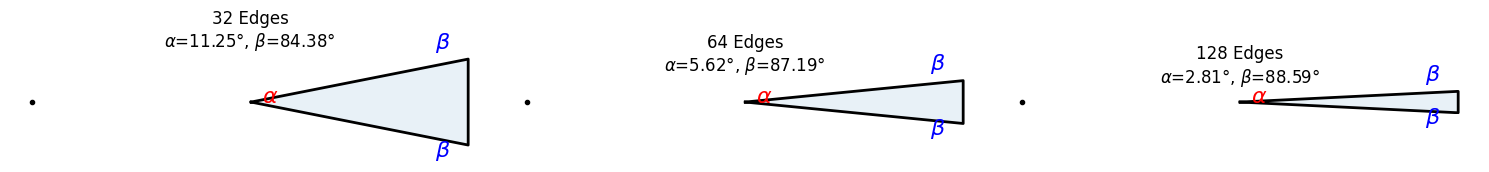

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw diagram for given number of edges
def draw_angle_diagram(n_edges, ax):
    alpha = 360 / n_edges
    beta = 90 - (180 / n_edges)

    # Coordinates for one triangle segment
    inner_radius = 1
    outer_radius = 2

    # Calculate coordinates
    theta = np.radians(alpha / 2)
    inner_point = [inner_radius * np.cos(0), inner_radius * np.sin(0)]
    outer_point1 = [outer_radius * np.cos(-theta), outer_radius * np.sin(-theta)]
    outer_point2 = [outer_radius * np.cos(theta), outer_radius * np.sin(theta)]

    # Triangle vertices
    triangle = np.array([inner_point, outer_point1, outer_point2, inner_point])

    # Plot triangle
    ax.plot(triangle[:, 0], triangle[:, 1], 'k-', linewidth=2)
    ax.fill(triangle[:, 0], triangle[:, 1], alpha=0.1)

    # Label alpha at inner vertex
    ax.text(inner_point[0] + 0.05, inner_point[1], r'$\alpha$', fontsize=16, color='red')

    # Label beta at outer vertices
    ax.text(outer_point1[0] - 0.15, outer_point1[1] - 0.05, r'$\beta$', fontsize=16, color='blue')
    ax.text(outer_point2[0] - 0.15, outer_point2[1] + 0.05, r'$\beta$', fontsize=16, color='blue')

    # Center and axes formatting
    ax.plot(0, 0, 'ko', markersize=3, label='Center')
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.set_title(f'{n_edges} Edges\n' + r'$\alpha$' + f'={alpha:.2f}°, ' + r'$\beta$' + f'={beta:.2f}°')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Draw diagrams
draw_angle_diagram(32, axs[0])
draw_angle_diagram(64, axs[1])
draw_angle_diagram(128, axs[2])

plt.tight_layout()
plt.show()


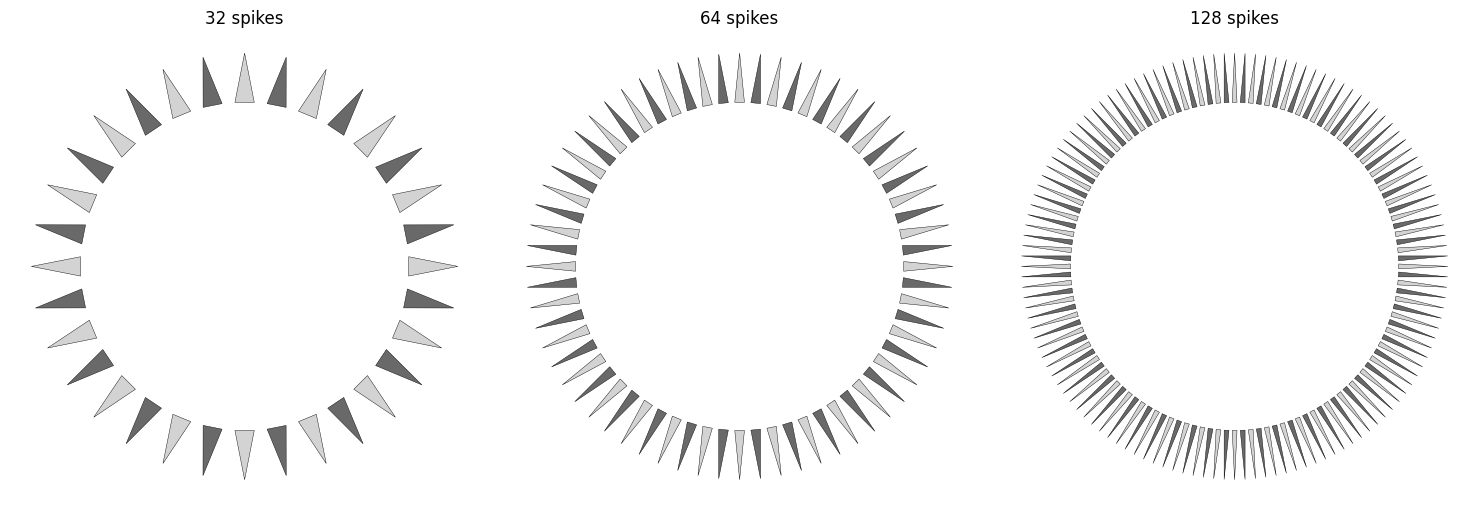

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_spiky_ring(n=64,
                    R_inner=1.0,
                    R_outer=1.3,
                    base_frac=0.6,
                    cmap=('lightgray','dimgray'),
                    ax=None):
    """
    Draw a 2D spiky ring with n spikes.

    Parameters
    ----------
    n : int
        Number of spikes around the circle.
    R_inner : float
        Radius at which each triangle's base is centered.
    R_outer : float
        Radius at which each triangle's tip lies.
    base_frac : float in (0,1)
        Fraction of the angular spacing (2π/n) to use as the base width.
    cmap : tuple of 2 color specs
        Colors for even/odd triangles.
    ax : matplotlib Axes (optional)
        If provided, draw on this Axes; otherwise create a new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))

    # angular spacing and base half‑width (in radians)
    Δθ = 2*np.pi / n
    base_half = base_frac * Δθ / 2

    for i in range(n):
        θ = i * Δθ
        # direction vectors
        u = np.array([np.cos(θ), np.sin(θ)])
        v = np.array([-np.sin(θ), np.cos(θ)])  # perpendicular

        # triangle tip
        tip = R_outer * u

        # triangle base endpoints
        base_center = R_inner * u
        p1 = base_center + R_inner * (np.tan(base_half)) * v
        p2 = base_center - R_inner * (np.tan(base_half)) * v

        tri = np.vstack([p1, p2, tip])
        color = cmap[i % 2]
        ax.add_patch(Polygon(tri, closed=True, facecolor=color, edgecolor='k', linewidth=0.3))

    ax.set_aspect('equal')
    ax.set_xlim(-R_outer*1.1, R_outer*1.1)
    ax.set_ylim(-R_outer*1.1, R_outer*1.1)
    ax.axis('off')
    return ax

if __name__ == "__main__":
    # Example: generate side‑by‑side for n=32, 64, 128
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    for ax, n in zip(axes, [32, 64, 128]):
        draw_spiky_ring(n=n, R_inner=1.0, R_outer=1.3, base_frac=0.6, ax=ax)
        ax.set_title(f"{n} spikes")
    plt.tight_layout()
    plt.show()


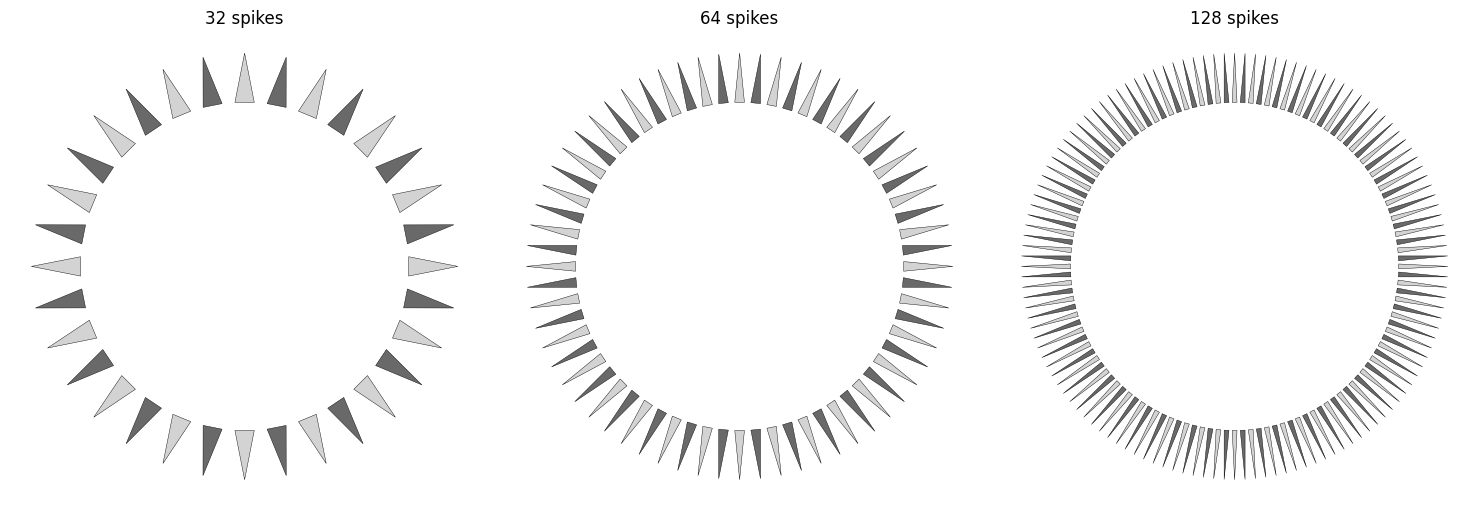

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_spiky_ring(n=64,
                    R_inner=1.0,
                    R_outer=1.3,
                    base_frac=0.6,
                    cmap=('lightgray','dimgray'),
                    ax=None):
    """
    Draw a 2D spiky ring with n spikes.

    Parameters
    ----------
    n : int
        Number of spikes around the circle.
    R_inner : float
        Radius at which each triangle's base is centered.
    R_outer : float
        Radius at which each triangle's tip lies.
    base_frac : float in (0,1)
        Fraction of the angular spacing (2π/n) to use as the base width.
    cmap : tuple of 2 color specs
        Colors for even/odd triangles.
    ax : matplotlib Axes (optional)
        If provided, draw on this Axes; otherwise create a new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))

    # angular spacing and base half‑width (in radians)
    Δθ = 2*np.pi / n
    base_half = base_frac * Δθ / 2

    for i in range(n):
        θ = i * Δθ
        # direction vectors
        u = np.array([np.cos(θ), np.sin(θ)])
        v = np.array([-np.sin(θ), np.cos(θ)])  # perpendicular

        # triangle tip
        tip = R_outer * u

        # triangle base endpoints
        base_center = R_inner * u
        p1 = base_center + R_inner * (np.tan(base_half)) * v
        p2 = base_center - R_inner * (np.tan(base_half)) * v

        tri = np.vstack([p1, p2, tip])
        color = cmap[i % 2]
        ax.add_patch(Polygon(tri, closed=True, facecolor=color, edgecolor='k', linewidth=0.3))

    ax.set_aspect('equal')
    ax.set_xlim(-R_outer*1.1, R_outer*1.1)
    ax.set_ylim(-R_outer*1.1, R_outer*1.1)
    ax.axis('off')
    return ax

if __name__ == "__main__":
    # Example: generate side‑by‑side for n=32, 64, 128
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    for ax, n in zip(axes, [32, 64, 128]):
        draw_spiky_ring(n=n, R_inner=1.0, R_outer=1.3, base_frac=0.6, ax=ax)
        ax.set_title(f"{n} spikes")
    plt.tight_layout()
    plt.show()


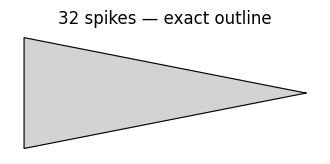

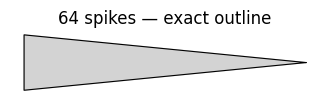

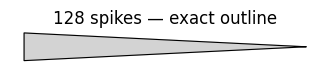

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_spike_vertices(i, n, R_inner, R_outer, base_frac):
    Δθ = 2*np.pi/n
    θ  = i * Δθ
    u  = np.array([np.cos(θ), np.sin(θ)])
    v  = np.array([-np.sin(θ), np.cos(θ)])
    base_center = R_inner * u
    half_ang    = base_frac * Δθ/2
    w           = np.tan(half_ang) * R_inner
    p1 = base_center +  w*v
    p2 = base_center -  w*v
    tip= R_outer * u
    return [tuple(p1), tuple(p2), tuple(tip)]

def get_outline_pts(n=64, R_inner=1.0, R_outer=1.3, base_frac=0.6):
    # collect all triangles and count their edges
    edge_count = {}
    def add_edge(a,b):
        key = (a,b) if a<b else (b,a)
        edge_count[key] = edge_count.get(key,0) + 1

    tris = []
    for i in range(n):
        tri = make_spike_vertices(i, n, R_inner, R_outer, base_frac)
        tris.append(tri)
        # add each of the 3 edges
        add_edge(tri[0], tri[1])
        add_edge(tri[1], tri[2])
        add_edge(tri[2], tri[0])

    # boundary edges are those seen exactly once
    boundary = [e for e,c in edge_count.items() if c==1]

    # build adjacency map of boundary graph
    adj = {}
    for a,b in boundary:
        adj.setdefault(a, []).append(b)
        adj.setdefault(b, []).append(a)

    # start from an extremal point (max x)
    start = max(adj.keys(), key=lambda p: p[0])
    outline = [start]
    prev = None
    cur  = start
    # walk until we return
    while True:
        neighs = adj[cur]
        # pick the neighbor that's not the previous
        nxt = neighs[0] if neighs[0]!=prev else neighs[1]
        if nxt==start:
            break
        outline.append(nxt)
        prev, cur = cur, nxt

    xs, ys = zip(*(outline+[start]))
    return xs, ys

if __name__=="__main__":
    for n in (32, 64, 128):
        xs, ys = get_outline_pts(n, R_inner=1.0, R_outer=1.3, base_frac=0.6)
        plt.figure(figsize=(4,4))
        plt.fill(xs, ys, color="lightgray")
        plt.plot(xs, ys, color="k", linewidth=0.8)
        plt.gca().set_aspect("equal")
        plt.axis("off")
        plt.title(f"{n} spikes — exact outline")
    plt.show()


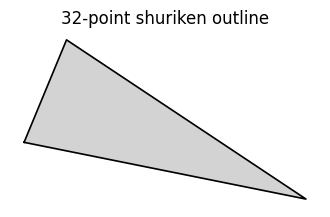

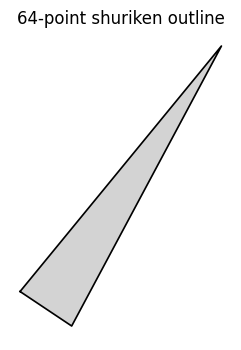

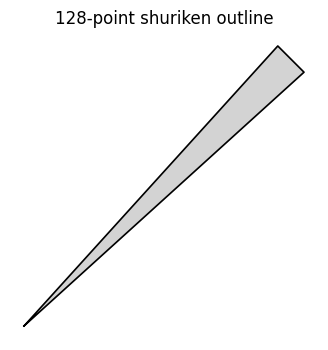

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union

def make_spike(i, n, R_inner, R_outer, base_frac):
    Δθ = 2*np.pi/n
    θ  = i * Δθ
    u  = np.array([np.cos(θ), np.sin(θ)])
    v  = np.array([-np.sin(θ), np.cos(θ)])
    base_center = R_inner * u
    half_ang    = base_frac * Δθ/2
    w           = np.tan(half_ang) * R_inner
    p1 = base_center +  w*v
    p2 = base_center -  w*v
    tip= R_outer * u
    return Polygon([tuple(p1), tuple(p2), tuple(tip)])

def shuriken_outline(n=64, R_inner=1.0, R_outer=1.3, base_frac=0.6):
    # 1) Build all the spikes
    tris = [make_spike(i, n, R_inner, R_outer, base_frac)
            for i in range(n)]
    # 2) Union into one or more polygons
    U = unary_union(tris)
    # 3) If we got a MultiPolygon, keep only the largest piece
    if isinstance(U, MultiPolygon):
        U = max(U.geoms, key=lambda p: p.area)
    # 4) Extract the outer boundary coords
    outer_x, outer_y = U.exterior.xy
    # 5) (Optional) any inner holes
    holes = [ (interior.xy[0], interior.xy[1])
              for interior in U.interiors ]
    return (outer_x, outer_y), holes

if __name__ == "__main__":
    for n in (32, 64, 128):
        (ox, oy), holes = shuriken_outline(n, 1.0, 1.3, 0.6)
        fig, ax = plt.subplots(figsize=(4,4))
        ax.fill(ox, oy, color='lightgray', zorder=0)
        ax.plot(ox, oy, color='k', lw=1.2, zorder=1)
        for hx, hy in holes:
            ax.plot(hx, hy, color='k', lw=1.0, zorder=1)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f"{n}-point shuriken outline")
    plt.show()


#Geometry analysis

## Parameter Definitions

- **n**  
  Number of edges (and spikes) in the ring. Controls the wedge angle  
  $$
    \gamma(n) \;=\;\frac{2\pi}{n}
    \quad\longrightarrow\quad
    \gamma(n)\text{ (deg)}=\frac{360^\circ}{n}.
  $$

- **R**  
  Circum‑radius of the underlying regular *n*‑gon (distance from center to each base vertex).

- **H**  
  Height of each triangular spike, measured perpendicular to the base plane.

- **h**  
  Normalized height ratio:  
  $$
    h \;=\;\frac{H}{R}.
  $$

- **Apex angle** ($\gamma$)  
  The tip angle of each spike:  
  $$
    \gamma(n)=\frac{2\pi}{n},
    \quad
    \gamma(n)\text{ (deg)}=\frac{360^\circ}{n}.
  $$

- **Base angles** ($\beta$)  
  Each of the two equal base angles in cross‑section:  
  $$
    \beta(n)
    =\frac{\pi-\gamma(n)}{2},
    \quad
    \beta(n)\text{ (deg)}=\frac{180^\circ-\gamma(n)}{2}.
  $$

- **Base‑edge (chord) length** ($b$)  
  Length of each foundation edge on the circle of radius $R$:  
  $$
    b(n)=2\,R\,\sin\!\bigl(\tfrac{\pi}{n}\bigr),
    \quad
    \frac{b(n)}{R}=2\,\sin\!\bigl(\tfrac{\pi}{n}\bigr).
  $$

- **Half‑fold (inclination)** ($\phi$)  
  Angle between the spike face and the horizontal base plane:  
  $$
    \phi(n)
    =\arctan\!\Bigl(\frac{H}{b(n)/2}\Bigr)
    =\arctan\!\Bigl(\frac{h}{\sin(\pi/n)}\Bigr).
  $$

- **Fold (dihedral) angle** ($\delta$)  
  Full dihedral between face and base plane:  
  $$
    \delta(n)
    =2\,\phi(n)
    =2\,\arctan\!\Bigl(\frac{h}{\sin(\pi/n)}\Bigr).
  $$

- **Inclination above horizontal** ($\alpha$)  
  Alternative expression via the projected chord:  
  $$
    \alpha(n)
    =\arctan\!\Bigl(\frac{2\,H}{R\,\bigl(1-\cos(\pi/n)\bigr)}\Bigr)
    =\arctan\!\Bigl(\frac{2\,h}{1-\cos(\pi/n)}\Bigr).
  $$


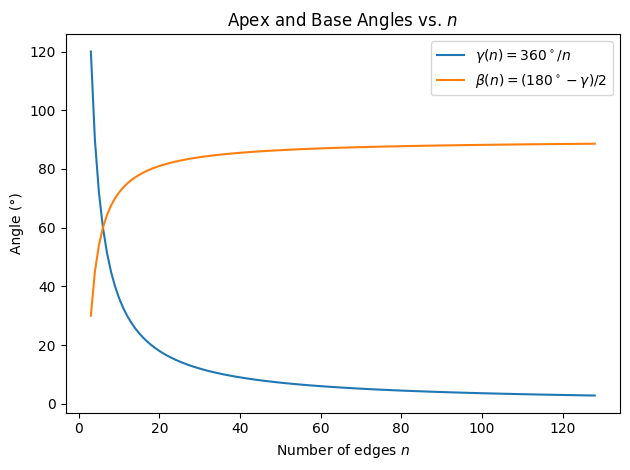

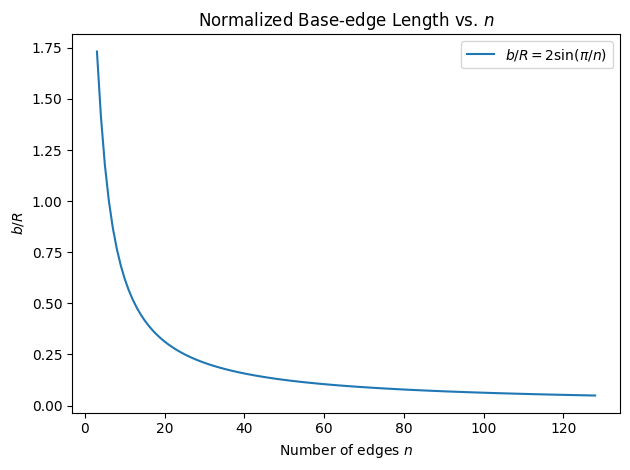

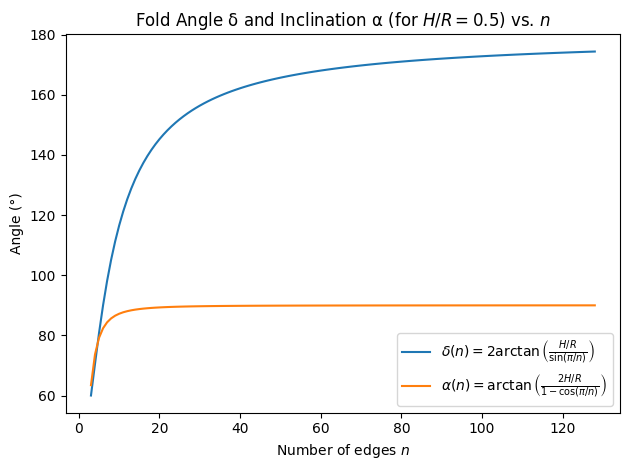

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define n array
n = np.arange(3, 129)

# Core geometry formulas
gamma = 360.0 / n                              # apex angle in degrees
beta = (180.0 - gamma) / 2.0                   # base angles in degrees
b_over_R = 2.0 * np.sin(np.pi / n)             # normalized base-edge length

# Choose a representative height ratio for fold/inclination plots
H_over_R = 0.5
delta = 2.0 * np.degrees(np.arctan(H_over_R / np.sin(np.pi / n)))  # dihedral fold in degrees
alpha = np.degrees(np.arctan((2.0 * H_over_R) / (1.0 - np.cos(np.pi / n))))  # inclination in degrees

# Plot 1: Apex and Base Angles
plt.figure()
plt.plot(n, gamma, label=r'$\gamma(n)=360^\circ/n$')
plt.plot(n, beta,  label=r'$\beta(n)=(180^\circ-\gamma)/2$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Apex and Base Angles vs. $n$')
plt.legend()
plt.tight_layout()

# Plot 2: Normalized Base-Edge Length
plt.figure()
plt.plot(n, b_over_R, label=r'$b/R=2\sin(\pi/n)$')
plt.xlabel('Number of edges $n$')
plt.ylabel(r'$b/R$')
plt.title('Normalized Base-edge Length vs. $n$')
plt.legend()
plt.tight_layout()

# Plot 3: Fold Angle δ and Inclination α for H/R=0.5
plt.figure()
plt.plot(n, delta, label=r'$\delta(n)=2\arctan\left(\frac{H/R}{\sin(\pi/n)}\right)$')
plt.plot(n, alpha, label=r'$\alpha(n)=\arctan\left(\frac{2H/R}{1-\cos(\pi/n)}\right)$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Fold Angle δ and Inclination α (for $H/R=0.5$) vs. $n$')
plt.legend()
plt.tight_layout()

plt.show()


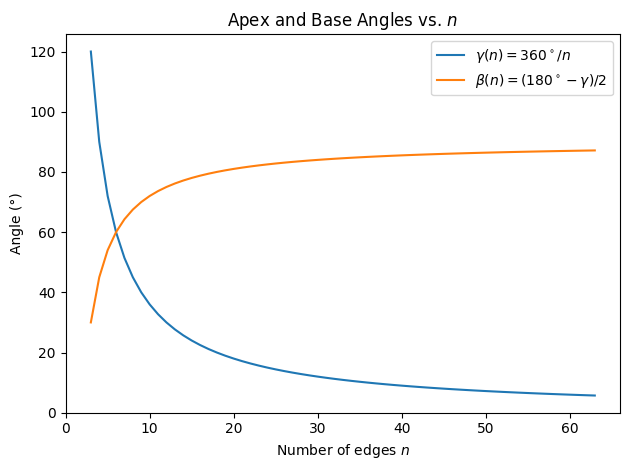

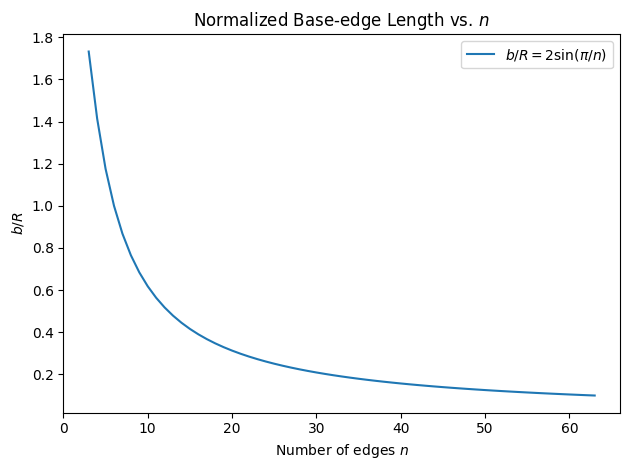

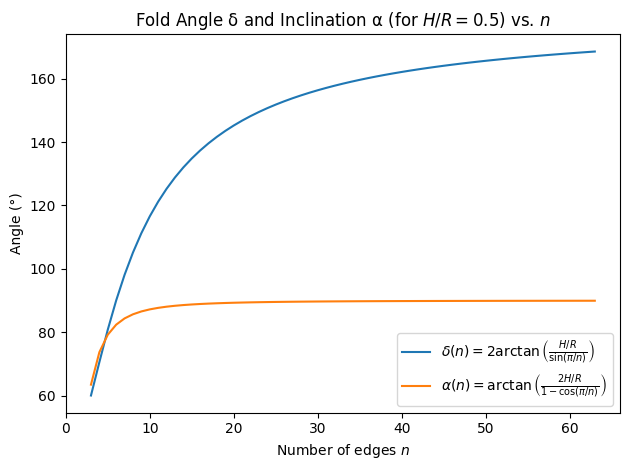

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define n array
n = np.arange(3, 64)

# Core geometry formulas
gamma = 360.0 / n                              # apex angle in degrees
beta = (180.0 - gamma) / 2.0                   # base angles in degrees
b_over_R = 2.0 * np.sin(np.pi / n)             # normalized base-edge length

# Choose a representative height ratio for fold/inclination plots
H_over_R = 0.5
delta = 2.0 * np.degrees(np.arctan(H_over_R / np.sin(np.pi / n)))  # dihedral fold in degrees
alpha = np.degrees(np.arctan((2.0 * H_over_R) / (1.0 - np.cos(np.pi / n))))  # inclination in degrees

# Plot 1: Apex and Base Angles
plt.figure()
plt.plot(n, gamma, label=r'$\gamma(n)=360^\circ/n$')
plt.plot(n, beta,  label=r'$\beta(n)=(180^\circ-\gamma)/2$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Apex and Base Angles vs. $n$')
plt.legend()
plt.tight_layout()

# Plot 2: Normalized Base-Edge Length
plt.figure()
plt.plot(n, b_over_R, label=r'$b/R=2\sin(\pi/n)$')
plt.xlabel('Number of edges $n$')
plt.ylabel(r'$b/R$')
plt.title('Normalized Base-edge Length vs. $n$')
plt.legend()
plt.tight_layout()

# Plot 3: Fold Angle δ and Inclination α for H/R=0.5
plt.figure()
plt.plot(n, delta, label=r'$\delta(n)=2\arctan\left(\frac{H/R}{\sin(\pi/n)}\right)$')
plt.plot(n, alpha, label=r'$\alpha(n)=\arctan\left(\frac{2H/R}{1-\cos(\pi/n)}\right)$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Fold Angle δ and Inclination α (for $H/R=0.5$) vs. $n$')
plt.legend()
plt.tight_layout()

plt.show()


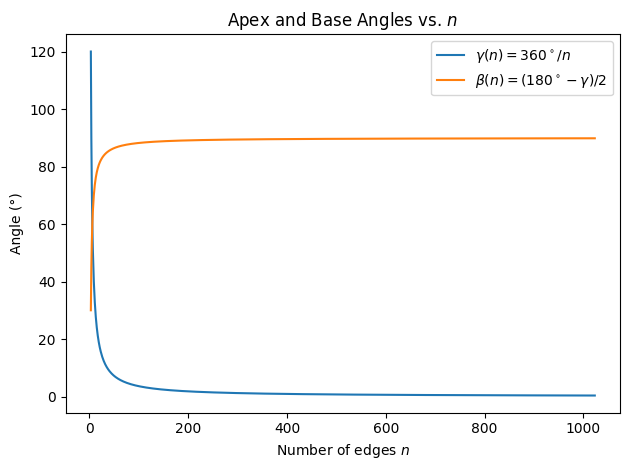

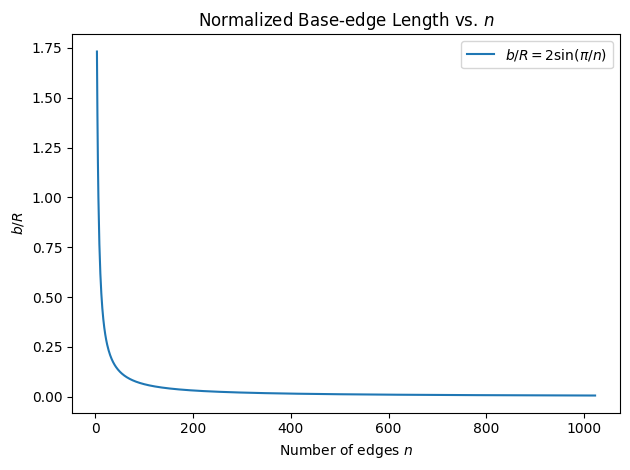

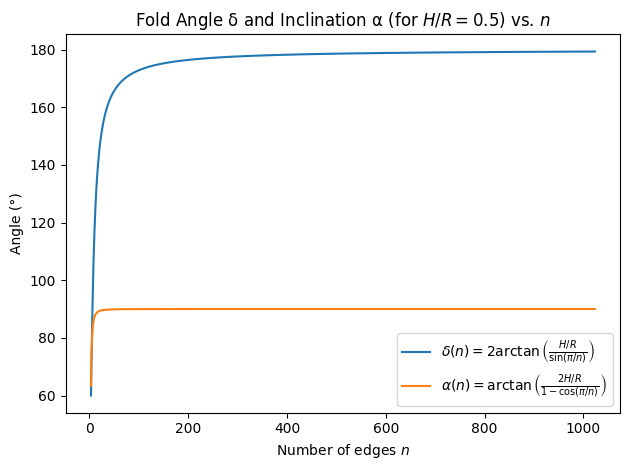

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define n array
n = np.arange(3, 1024)

# Core geometry formulas
gamma = 360.0 / n                              # apex angle in degrees
beta = (180.0 - gamma) / 2.0                   # base angles in degrees
b_over_R = 2.0 * np.sin(np.pi / n)             # normalized base-edge length

# Choose a representative height ratio for fold/inclination plots
H_over_R = 0.5
delta = 2.0 * np.degrees(np.arctan(H_over_R / np.sin(np.pi / n)))  # dihedral fold in degrees
alpha = np.degrees(np.arctan((2.0 * H_over_R) / (1.0 - np.cos(np.pi / n))))  # inclination in degrees

# Plot 1: Apex and Base Angles
plt.figure()
plt.plot(n, gamma, label=r'$\gamma(n)=360^\circ/n$')
plt.plot(n, beta,  label=r'$\beta(n)=(180^\circ-\gamma)/2$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Apex and Base Angles vs. $n$')
plt.legend()
plt.tight_layout()

# Plot 2: Normalized Base-Edge Length
plt.figure()
plt.plot(n, b_over_R, label=r'$b/R=2\sin(\pi/n)$')
plt.xlabel('Number of edges $n$')
plt.ylabel(r'$b/R$')
plt.title('Normalized Base-edge Length vs. $n$')
plt.legend()
plt.tight_layout()

# Plot 3: Fold Angle δ and Inclination α for H/R=0.5
plt.figure()
plt.plot(n, delta, label=r'$\delta(n)=2\arctan\left(\frac{H/R}{\sin(\pi/n)}\right)$')
plt.plot(n, alpha, label=r'$\alpha(n)=\arctan\left(\frac{2H/R}{1-\cos(\pi/n)}\right)$')
plt.xlabel('Number of edges $n$')
plt.ylabel('Angle (°)')
plt.title('Fold Angle δ and Inclination α (for $H/R=0.5$) vs. $n$')
plt.legend()
plt.tight_layout()

plt.show()


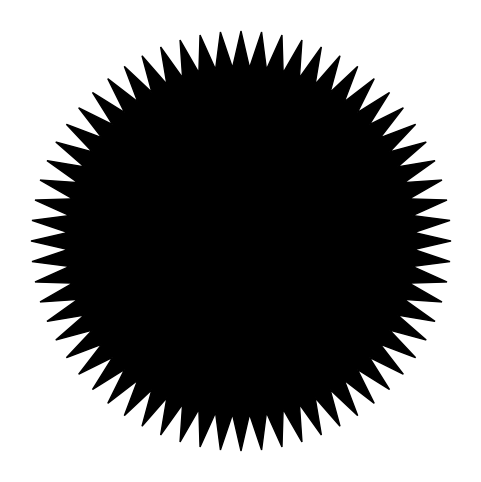

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate
from shapely.ops import unary_union

def make_single_gadget(base_angle_deg=10, inner_scale=0.5, tip_scale=1.3, width=0.3):
    """
    Constructs a single shuriken gadget with layered arrow shapes.
    """
    base_angle_rad = np.radians(base_angle_deg)
    R = 1.0  # Distance from center to base

    # Outer triangle (larger spike)
    outer = Polygon([
        (0, 0),
        (R * np.sin(base_angle_rad / 2), R * np.cos(base_angle_rad / 2)),
        (-R * np.sin(base_angle_rad / 2), R * np.cos(base_angle_rad / 2))
    ])

    # Inner triangle (smaller spike nested within)
    inner = Polygon([
        (0, 0),
        (inner_scale * R * np.sin(base_angle_rad / 2), inner_scale * R * np.cos(base_angle_rad / 2)),
        (-inner_scale * R * np.sin(base_angle_rad / 2), inner_scale * R * np.cos(base_angle_rad / 2))
    ])

    # Tip triangle overlay for sharp inner visual
    tip = Polygon([
        (0, tip_scale * R),
        (width, 0),
        (-width, 0)
    ])

    return outer.difference(inner).union(tip)

def generate_shuriken(n=32):
    """
    Generates the full shuriken by repeating a single gadget n times.
    """
    angle_step = 360 / n
    gadget = make_single_gadget(base_angle_deg=angle_step)

    blades = []
    for i in range(n):
        rotated = rotate(gadget, i * angle_step, origin=(0, 0), use_radians=False)
        blades.append(rotated)

    return unary_union(blades)

def plot_shape(shape, filename=None):
    fig, ax = plt.subplots(figsize=(6,6))
    if shape.geom_type == 'Polygon':
        polygons = [shape]
    else:
        polygons = shape.geoms

    for poly in polygons:
        x, y = poly.exterior.xy
        ax.fill(x, y, color='black')

    ax.set_aspect('equal')
    ax.axis('off')
    if filename:
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

# Example usage
n = 64  # Change to 32, 128, etc.
shuriken = generate_shuriken(n)
plot_shape(shuriken, filename=f'shuriken_{n}.png')


#Replication

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'


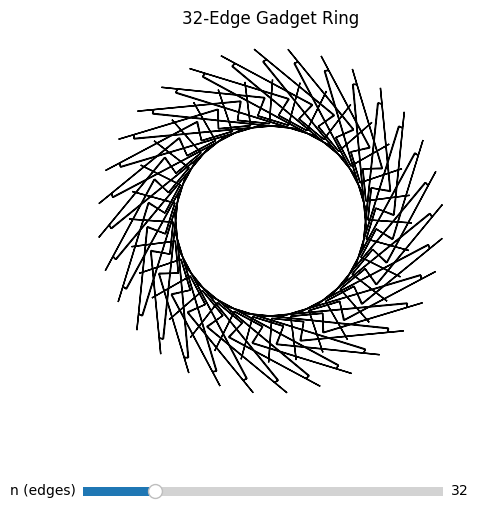

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import shapely.geometry as geom
import shapely.affinity as affinity

# Reload the image and preprocess for tracing
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw_img, threshold1=50, threshold2=150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
contour_points = approx[:, 0, :]

# Convert to shapely polygon and center it
gadget_shape = geom.Polygon(contour_points)
cx, cy = gadget_shape.centroid.coords[0]
gadget_centered = affinity.translate(gadget_shape, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius=300):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        angle_rad = np.deg2rad(angle_step * i)
        x = radius * np.cos(angle_rad)
        y = radius * np.sin(angle_rad)
        moved = affinity.translate(polygon, xoff=x, yoff=y)
        rotated = affinity.rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated)
    return gadgets

# Plotting function with a slider
fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.25)

def plot_shuriken(n):
    ax.clear()
    gadgets = replicate_ring(gadget_centered, n)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Gadget Ring")
    ax.set_aspect('equal')
    ax.axis('off')
    fig.canvas.draw_idle()

# Initial plot
initial_n = 32
plot_shuriken(initial_n)

# Slider setup
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(ax_slider, 'n (edges)', 8, 128, valinit=initial_n, valstep=1)

def update(val):
    n = int(slider.val)
    plot_shuriken(n)

slider.on_changed(update)
plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate
import ipywidgets as widgets
from IPython.display import display, clear_output

# Path to your gadget image in Google Drive (adjust as needed)
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'

# Load and trace gadget
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
points = approx[:, 0, :]

# Convert to shapely polygon and center
gadget_poly = Polygon(points)
cx, cy = gadget_poly.centroid.coords[0]
gadget_centered = translate(gadget_poly, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius=200):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        theta = np.deg2rad(i * angle_step)
        x, y = radius * np.cos(theta), radius * np.sin(theta)
        moved = translate(polygon, xoff=x, yoff=y)
        rotated_poly = rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated_poly)
    return gadgets

# Plotting function
def plot_shuriken(n):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6, 6))
    gadgets = replicate_ring(gadget_centered, n)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Gadget Ring")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Slider widget
slider = widgets.IntSlider(value=32, min=1, max=128, step=1, description='Edges (n):')
widgets.interact(plot_shuriken, n=slider)

interactive(children=(IntSlider(value=32, description='Edges (n):', max=128, min=1), Output()), _dom_classes=(…

<function __main__.plot_shuriken(n)>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate
import ipywidgets as widgets
from IPython.display import display, clear_output

# Path to your gadget image in Google Drive (adjust as needed)
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'

# Load and trace gadget
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
points = approx[:, 0, :]

# Convert to shapely polygon and center
gadget_poly = Polygon(points)
cx, cy = gadget_poly.centroid.coords[0]
gadget_centered = translate(gadget_poly, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius=300):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        theta = np.deg2rad(i * angle_step)
        x, y = radius * np.cos(theta), radius * np.sin(theta)
        moved = translate(polygon, xoff=x, yoff=y)
        rotated_poly = rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated_poly)
    return gadgets

# Plotting function
def plot_shuriken(n):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6, 6))
    gadgets = replicate_ring(gadget_centered, n)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Gadget Ring")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Slider widget
slider = widgets.IntSlider(value=32, min=1, max=1024, step=1, description='Edges (n):')
widgets.interact(plot_shuriken, n=slider)

interactive(children=(IntSlider(value=32, description='Edges (n):', max=1024, min=1), Output()), _dom_classes=…

<function __main__.plot_shuriken(n)>

## R slider

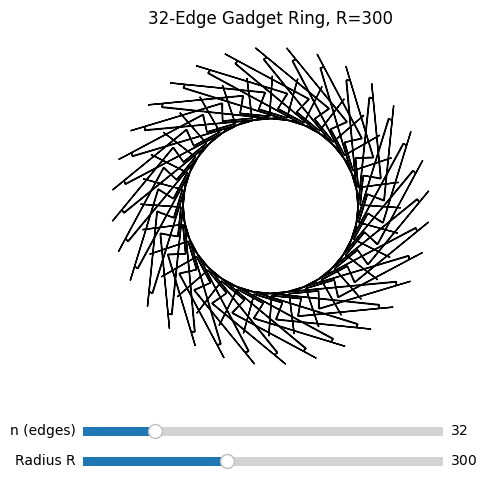

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import shapely.geometry as geom
import shapely.affinity as affinity

# Reload the image and preprocess for tracing
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw_img, threshold1=50, threshold2=150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
contour_points = approx[:, 0, :]

# Convert to shapely polygon and center it
gadget_shape = geom.Polygon(contour_points)
cx, cy = gadget_shape.centroid.coords[0]
gadget_centered = affinity.translate(gadget_shape, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        angle_rad = np.deg2rad(angle_step * i)
        x = radius * np.cos(angle_rad)
        y = radius * np.sin(angle_rad)
        moved = affinity.translate(polygon, xoff=x, yoff=y)
        rotated = affinity.rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated)
    return gadgets

# Plotting setup
fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.3)

# Plotting function with parameters n and R
def plot_shuriken(n, R):
    ax.clear()
    gadgets = replicate_ring(gadget_centered, n, R)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Gadget Ring, R={R:.0f}")
    ax.set_aspect('equal')
    ax.axis('off')
    fig.canvas.draw_idle()

# Initial values
initial_n = 32
initial_R = 300
plot_shuriken(initial_n, initial_R)

# Slider for n (edges)
ax_slider_n = plt.axes([0.2, 0.2, 0.6, 0.03])
slider_n = Slider(ax_slider_n, 'n (edges)', 8, 128, valinit=initial_n, valstep=1)

# Slider for R (radius)
ax_slider_R = plt.axes([0.2, 0.15, 0.6, 0.03])
slider_R = Slider(ax_slider_R, 'Radius R', 100, 600, valinit=initial_R, valstep=10)

# Update function for both sliders
def update(val):
    n = int(slider_n.val)
    R = slider_R.val
    plot_shuriken(n, R)

slider_n.on_changed(update)
slider_R.on_changed(update)

plt.show()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate
import ipywidgets as widgets
from IPython.display import display, clear_output

# Path to your gadget image in Google Drive (adjust as needed)
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'

# Load and trace gadget
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
points = approx[:, 0, :]

# Convert to shapely polygon and center
gadget_poly = Polygon(points)
cx, cy = gadget_poly.centroid.coords[0]
gadget_centered = translate(gadget_poly, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        theta = np.deg2rad(i * angle_step)
        x, y = radius * np.cos(theta), radius * np.sin(theta)
        moved = translate(polygon, xoff=x, yoff=y)
        rotated_poly = rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated_poly)
    return gadgets

# Plotting function now takes both n and R
def plot_shuriken(n, R):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6, 6))
    gadgets = replicate_ring(gadget_centered, n, R)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Gadget Ring, R={R}")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Sliders
slider_n = widgets.IntSlider(value=32, min=1, max=128, step=1, description='Edges (n):')
slider_R = widgets.IntSlider(value=200, min=50, max=400, step=10, description='Radius (R):')

# Bind them together
widgets.interact(plot_shuriken, n=slider_n, R=slider_R)


interactive(children=(IntSlider(value=32, description='Edges (n):', max=128, min=1), IntSlider(value=200, desc…

<function __main__.plot_shuriken(n, R)>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate
import ipywidgets as widgets
from IPython.display import display, clear_output

# Path to your gadget image in Google Drive (adjust as needed)
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'

# Load and trace gadget
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
points = approx[:, 0, :]

# Convert to shapely polygon and center
gadget_poly = Polygon(points)
cx, cy = gadget_poly.centroid.coords[0]
gadget_centered = translate(gadget_poly, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        theta = np.deg2rad(i * angle_step)
        x, y = radius * np.cos(theta), radius * np.sin(theta)
        moved = translate(polygon, xoff=x, yoff=y)
        rotated_poly = rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated_poly)
    return gadgets

# Plotting function now takes both n and R
def plot_shuriken(n, R):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6, 6))
    gadgets = replicate_ring(gadget_centered, n, R)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Gadget Ring, R={R}")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Sliders
slider_n = widgets.IntSlider(value=32, min=1, max=128, step=1, description='Edges (n):')
slider_R = widgets.IntSlider(value=200, min=0, max=1000, step=10, description='Radius (R):')

# Bind them together
widgets.interact(plot_shuriken, n=slider_n, R=slider_R)

interactive(children=(IntSlider(value=32, description='Edges (n):', max=128, min=1), IntSlider(value=200, desc…

<function __main__.plot_shuriken(n, R)>

# S slider

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import display, clear_output

# Path to your gadget image in Google Drive (adjust as needed)
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'

# Load and trace gadget
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
points = approx[:, 0, :]

# Convert to shapely polygon and center
gadget_poly = Polygon(points)
cx, cy = gadget_poly.centroid.coords[0]
gadget_centered = translate(gadget_poly, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        theta = np.deg2rad(i * angle_step)
        x, y = radius * np.cos(theta), radius * np.sin(theta)
        moved = translate(polygon, xoff=x, yoff=y)
        rotated_poly = rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated_poly)
    return gadgets

# Plotting function now takes n, R, and scale factor s
def plot_shuriken(n, R, s):
    clear_output(wait=True)
    # apply scale to the centered gadget polygon
    scaled_poly = shapely_scale(gadget_centered, xfact=s, yfact=s, origin=(0, 0))
    fig, ax = plt.subplots(figsize=(6, 6))
    gadgets = replicate_ring(scaled_poly, n, R)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Ring, R={R}, Scale={s}")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Sliders
slider_n = widgets.IntSlider(value=32, min=1, max=128, step=1, description='Edges (n):')
slider_R = widgets.IntSlider(value=200, min=50, max=400, step=10, description='Radius (R):')
slider_s = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Scale (s):')

# Bind them together
widgets.interact(plot_shuriken, n=slider_n, R=slider_R, s=slider_s)


interactive(children=(IntSlider(value=32, description='Edges (n):', max=128, min=1), IntSlider(value=200, desc…

<function __main__.plot_shuriken(n, R, s)>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import display, clear_output

# Path to your gadget image in Google Drive (adjust as needed)
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'

# Load and trace gadget
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main_contour = max(contours, key=cv2.contourArea)
epsilon = 0.001 * cv2.arcLength(main_contour, True)
approx = cv2.approxPolyDP(main_contour, epsilon, True)
points = approx[:, 0, :]

# Convert to shapely polygon and center
gadget_poly = Polygon(points)
cx, cy = gadget_poly.centroid.coords[0]
gadget_centered = translate(gadget_poly, xoff=-cx, yoff=-cy)

# Replication function
def replicate_ring(polygon, n, radius):
    angle_step = 360 / n
    gadgets = []
    for i in range(n):
        theta = np.deg2rad(i * angle_step)
        x, y = radius * np.cos(theta), radius * np.sin(theta)
        moved = translate(polygon, xoff=x, yoff=y)
        rotated_poly = rotate(moved, angle_step * i, origin=(x, y))
        gadgets.append(rotated_poly)
    return gadgets

# Plotting function now takes n, R, and scale factor s
def plot_shuriken(n, R, s):
    clear_output(wait=True)
    # apply scale to the centered gadget polygon
    scaled_poly = shapely_scale(gadget_centered, xfact=s, yfact=s, origin=(0, 0))
    fig, ax = plt.subplots(figsize=(6, 6))
    gadgets = replicate_ring(scaled_poly, n, R)
    for g in gadgets:
        x, y = g.exterior.xy
        ax.fill(x, y, color='black')
    ax.set_title(f"{n}-Edge Ring, R={R}, Scale={s}")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Sliders
slider_n = widgets.IntSlider(value=32, min=1, max=128, step=1, description='Edges (n):')
slider_R = widgets.IntSlider(value=200, min=0, max=1000, step=10, description='Radius (R):')
slider_s = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Scale (s):')

# Bind them together
widgets.interact(plot_shuriken, n=slider_n, R=slider_R, s=slider_s)


interactive(children=(IntSlider(value=32, description='Edges (n):', max=128, min=1), IntSlider(value=200, desc…

<function __main__.plot_shuriken(n, R, s)>

#Second gadget

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import clear_output

# 1) Load & trace your gadget
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main = max(contours, key=cv2.contourArea)
eps  = 0.001 * cv2.arcLength(main, True)
approx = cv2.approxPolyDP(main, eps, True)
pts = approx[:,0,:]
gadget = Polygon(pts)

# center at origin
cx, cy = gadget.centroid.coords[0]
gadget_centered = translate(gadget, xoff=-cx, yoff=-cy)

# for offset calculation
orig_minx, orig_miny, orig_maxx, orig_maxy = gadget_centered.bounds
base_height = orig_maxy - orig_miny

def plot_ring(n, R, s1, s2, cells):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(n):
        angle_deg = 360/n * i
        θ = np.deg2rad(angle_deg)
        # position of this cell
        px, py = R*np.cos(θ), R*np.sin(θ)

        # --- primary gadget ---
        p1 = shapely_scale(gadget_centered, xfact=s1, yfact=s1, origin=(0,0))
        p1 = translate(p1, xoff=px, yoff=py)
        p1 = rotate(p1, angle_deg, origin=(px,py))
        x1,y1 = p1.exterior.xy
        ax.fill(x1, y1, color='black')

        if cells == 2:
            # compute a small “up‐offset” along the gadget’s local y-axis
            h = base_height * s1
            dx =  h * (-np.sin(θ))
            dy =  h * ( np.cos(θ))

            # scale & rotate the secondary gadget
            p2 = shapely_scale(gadget_centered, xfact=s2, yfact=s2, origin=(0,0))
            p2 = rotate(p2, angle_deg, origin=(0,0))
            # place it at the top corner
            p2 = translate(p2, xoff=px+dx, yoff=py+dy)
            x2,y2 = p2.exterior.xy
            ax.fill(x2, y2, color='gray')   # gray so you can see the overlap

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# sliders
slider_n     = widgets.IntSlider(32, min=1,   max=128, step=1,  description='n:')
slider_R     = widgets.IntSlider(200, min=50,  max=400, step=10, description='R:')
slider_s1    = widgets.FloatSlider(1.0, min=0.1, max=3.0, step=0.1, description='s₁:')
slider_s2    = widgets.FloatSlider(1.0, min=0.1, max=3.0, step=0.1, description='s₂:')
slider_cells = widgets.IntSlider(1,   min=1,   max=2,   step=1,  description='cells:')

# launch interactive
widgets.interact(plot_ring,
                 n=slider_n,
                 R=slider_R,
                 s1=slider_s1,
                 s2=slider_s2,
                 cells=slider_cells);


interactive(children=(IntSlider(value=32, description='n:', max=128, min=1), IntSlider(value=200, description=…

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import clear_output

# 1) Load & trace your gadget
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main = max(contours, key=cv2.contourArea)
eps  = 0.001 * cv2.arcLength(main, True)
approx = cv2.approxPolyDP(main, eps, True)
pts = approx[:,0,:]
gadget = Polygon(pts)

# center at origin
cx, cy = gadget.centroid.coords[0]
gadget_centered = translate(gadget, xoff=-cx, yoff=-cy)

def plot_ring(n, R, s1, s2, cells):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
    angle_step = 360.0 / n

    # loop primary positions
    for i in range(n):
        base_angle = i * angle_step
        θ = np.deg2rad(base_angle)
        px, py = R*np.cos(θ), R*np.sin(θ)

        # primary gadget
        p1 = shapely_scale(gadget_centered, xfact=s1, yfact=s1, origin=(0,0))
        p1 = translate(p1, xoff=px, yoff=py)
        p1 = rotate(p1, base_angle, origin=(px,py))
        ax.fill(*p1.exterior.xy, color='black')

        if cells == 2:
            # place secondary at half‑step
            half_angle = base_angle + angle_step/2
            θ2 = np.deg2rad(half_angle)
            px2, py2 = R*np.cos(θ2), R*np.sin(θ2)
            p2 = shapely_scale(gadget_centered, xfact=s2, yfact=s2, origin=(0,0))
            p2 = translate(p2, xoff=px2, yoff=py2)
            p2 = rotate(p2, half_angle, origin=(px2,py2))
            ax.fill(*p2.exterior.xy, color='gray')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# sliders
slider_n     = widgets.IntSlider(32, min=1,   max=128, step=1, description='n:')
slider_R     = widgets.IntSlider(200, min=50,  max=400, step=10, description='R:')
slider_s1    = widgets.FloatSlider(1.0, min=0.1, max=3.0, step=0.1, description='s₁:')
slider_s2    = widgets.FloatSlider(1.0, min=0.1, max=3.0, step=0.1, description='s₂:')
slider_cells = widgets.IntSlider(1,   min=1,   max=2,   step=1,  description='cells:')

widgets.interact(plot_ring,
                 n=slider_n,
                 R=slider_R,
                 s1=slider_s1,
                 s2=slider_s2,
                 cells=slider_cells);


interactive(children=(IntSlider(value=32, description='n:', max=128, min=1), IntSlider(value=200, description=…

#Second gadget with delta R

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import clear_output

# 1) Load & trace your gadget
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main = max(contours, key=cv2.contourArea)
eps  = 0.001 * cv2.arcLength(main, True)
approx = cv2.approxPolyDP(main, eps, True)
pts = approx[:,0,:]
gadget = Polygon(pts)

# center at origin
cx, cy = gadget.centroid.coords[0]
gadget_centered = translate(gadget, xoff=-cx, yoff=-cy)

def plot_ring(n, R, s1, s2, cells, delta):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
    angle_step = 360.0 / n

    # draw primaries
    for i in range(n):
        base_angle = i * angle_step
        θ = np.deg2rad(base_angle)
        px, py = R*np.cos(θ), R*np.sin(θ)

        # primary gadget
        p1 = shapely_scale(gadget_centered, xfact=s1, yfact=s1, origin=(0,0))
        p1 = translate(p1, xoff=px, yoff=py)
        p1 = rotate(p1, base_angle, origin=(px,py))
        ax.fill(*p1.exterior.xy, color='black')

        # secondary gadgets (if cells=2)
        if cells == 2:
            half_angle = base_angle + angle_step/2
            θ2 = np.deg2rad(half_angle)
            # shift by delta along the SAME radius
            r2 = R + delta
            px2, py2 = r2*np.cos(θ2), r2*np.sin(θ2)

            p2 = shapely_scale(gadget_centered, xfact=s2, yfact=s2, origin=(0,0))
            p2 = translate(p2, xoff=px2, yoff=py2)
            p2 = rotate(p2, half_angle, origin=(px2,py2))
            ax.fill(*p2.exterior.xy, color='gray')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# sliders
slider_n     = widgets.IntSlider(32, min=1,   max=128, step=1,   description='n:')
slider_R     = widgets.IntSlider(200, min=50,  max=400, step=10,  description='R:')
slider_s1    = widgets.FloatSlider(1.0, min=0.1, max=3.0, step=0.1, description='s₁:')
slider_s2    = widgets.FloatSlider(1.0, min=0.1, max=3.0, step=0.1, description='s₂:')
slider_cells = widgets.IntSlider(1,   min=1,   max=2,   step=1,   description='cells:')
slider_delta = widgets.IntSlider(0,   min=-100, max=100, step=5,   description='ΔR:')

# bind interaction
widgets.interact(plot_ring,
                 n=slider_n,
                 R=slider_R,
                 s1=slider_s1,
                 s2=slider_s2,
                 cells=slider_cells,
                 delta=slider_delta);


interactive(children=(IntSlider(value=32, description='n:', max=128, min=1), IntSlider(value=200, description=…

In [ ]:
import numpy as np
import cv2
from shapely.geometry import Polygon
from shapely.affinity import translate

# — the same tracing code you already have —
image_path = '/content/drive/MyDrive/6.5310/Shuriken/images/single-gadget.png'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bw = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
main = max(contours, key=cv2.contourArea)
eps = 0.001 * cv2.arcLength(main, True)
approx = cv2.approxPolyDP(main, eps, True)
pts = approx[:,0,:]   # shape (M,2)

# center them at origin
poly = Polygon(pts)
cx, cy = poly.centroid.coords[0]
centered = pts - np.array([[cx, cy]])

# save to disk
print(centered.tolist())


[[-137.5630841121495, -198.642523364486], [111.43691588785049, 102.35747663551399], [120.43691588785049, 95.35747663551399], [140.4369158878505, 132.357476635514], [8.436915887850489, -111.64252336448601], [-27.56308411214951, -75.64252336448601], [-82.56308411214951, -141.642523364486], [10.436915887850489, -213.642523364486], [-82.56308411214951, -141.642523364486], [-28.56308411214951, -75.64252336448601], [10.436915887850489, -110.64252336448601], [119.43691588785049, 93.35747663551399], [113.43691588785049, 102.35747663551399]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import clear_output

# 1) Use your provided centered gadget coordinates:
gadget_coords = [
    [-137.5630841121495, -198.642523364486],
    [111.43691588785049, 102.35747663551399],
    [120.43691588785049, 95.35747663551399],
    [140.4369158878505, 132.357476635514],
    [8.436915887850489, -111.64252336448601],
    [-27.56308411214951, -75.64252336448601],
    [-82.56308411214951, -141.642523364486],
    [10.436915887850489, -213.642523364486],
    [-82.56308411214951, -141.642523364486],
    [-28.56308411214951, -75.64252336448601],
    [10.436915887850489, -110.64252336448601],
    [119.43691588785049, 93.35747663551399],
    [113.43691588785049, 102.35747663551399]
]
gadget_centered = Polygon(gadget_coords)

# 2) Plotting function
def plot_ring(n, R, s1, s2, cells, delta):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
    angle_step = 360.0 / n

    for i in range(n):
        base_angle = i * angle_step
        θ = np.deg2rad(base_angle)
        # primary gadget
        p1 = shapely_scale(gadget_centered, xfact=s1, yfact=s1, origin=(0,0))
        px, py = R*np.cos(θ), R*np.sin(θ)
        p1 = translate(p1, xoff=px, yoff=py)
        p1 = rotate(p1, base_angle, origin=(px,py))
        ax.fill(*p1.exterior.xy, color='black')

        if cells == 2:
            # secondary gadget interleaved by half‑step and offset along radius
            half_angle = base_angle + angle_step/2
            θ2 = np.deg2rad(half_angle)
            r2 = R + delta
            px2, py2 = r2*np.cos(θ2), r2*np.sin(θ2)
            p2 = shapely_scale(gadget_centered, xfact=s2, yfact=s2, origin=(0,0))
            p2 = translate(p2, xoff=px2, yoff=py2)
            p2 = rotate(p2, half_angle, origin=(px2,py2))
            ax.fill(*p2.exterior.xy, color='gray')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# 3) Sliders for interactive control
slider_n     = widgets.IntSlider(value=32, min=1,   max=128, step=1,   description='n:')
slider_R     = widgets.IntSlider(value=200, min=50,  max=400, step=10,  description='R:')
slider_s1    = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='s₁:')
slider_s2    = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='s₂:')
slider_cells = widgets.IntSlider(value=1,   min=1,   max=2,   step=1,   description='cells:')
slider_delta = widgets.IntSlider(value=0,   min=-100, max=100, step=5,   description='ΔR:')

# 4) Launch the interactive plot
widgets.interact(
    plot_ring,
    n      = slider_n,
    R      = slider_R,
    s1     = slider_s1,
    s2     = slider_s2,
    cells  = slider_cells,
    delta  = slider_delta
);


interactive(children=(IntSlider(value=32, description='n:', max=128, min=1), IntSlider(value=200, description=…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import clear_output

# 1) Use your provided centered gadget coordinates:
gadget_coords = [
    [-137.5630841121495, -198.642523364486],
    [111.43691588785049, 102.35747663551399],
    [120.43691588785049, 95.35747663551399],
    [140.4369158878505, 132.357476635514],
    [8.436915887850489, -111.64252336448601],
    [-27.56308411214951, -75.64252336448601],
    [-82.56308411214951, -141.642523364486],
    [10.436915887850489, -213.642523364486],
    [-82.56308411214951, -141.642523364486],
    [-28.56308411214951, -75.64252336448601],
    [10.436915887850489, -110.64252336448601],
    [119.43691588785049, 93.35747663551399],
    [113.43691588785049, 102.35747663551399]
]
gadget_centered = Polygon(gadget_coords)

# 2) Plotting function
def plot_ring(n, R, s1, s2, cells, delta):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
    angle_step = 360.0 / n

    for i in range(n):
        base_angle = i * angle_step
        θ = np.deg2rad(base_angle)
        # primary gadget
        p1 = shapely_scale(gadget_centered, xfact=s1, yfact=s1, origin=(0,0))
        px, py = R*np.cos(θ), R*np.sin(θ)
        p1 = translate(p1, xoff=px, yoff=py)
        p1 = rotate(p1, base_angle, origin=(px,py))
        ax.fill(*p1.exterior.xy, color='black')

        if cells == 2:
            # secondary gadget interleaved by half‑step and offset along radius
            half_angle = base_angle + angle_step/2
            θ2 = np.deg2rad(half_angle)
            r2 = R + delta
            px2, py2 = r2*np.cos(θ2), r2*np.sin(θ2)
            p2 = shapely_scale(gadget_centered, xfact=s2, yfact=s2, origin=(0,0))
            p2 = translate(p2, xoff=px2, yoff=py2)
            p2 = rotate(p2, half_angle, origin=(px2,py2))
            ax.fill(*p2.exterior.xy, color='gray')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# 3) Sliders for interactive control
slider_n     = widgets.IntSlider(value=32, min=1,   max=128, step=1,   description='n:')
slider_R     = widgets.IntSlider(value=200, min=50,  max=400, step=10,  description='R:')
slider_s1    = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='s₁:')
slider_s2    = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='s₂:')
slider_cells = widgets.IntSlider(value=1,   min=1,   max=2,   step=1,   description='cells:')
slider_delta = widgets.IntSlider(value=0,   min=-100, max=100, step=5,   description='ΔR:')

# 4) Launch the interactive plot
widgets.interact(
    plot_ring,
    n      = slider_n,
    R      = slider_R,
    s1     = slider_s1,
    s2     = slider_s2,
    cells  = slider_cells,
    delta  = slider_delta
);


interactive(children=(IntSlider(value=32, description='n:', max=128, min=1), IntSlider(value=200, description=…

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import translate, rotate, scale as shapely_scale
import ipywidgets as widgets
from IPython.display import clear_output

# 1) Use your provided centered gadget coordinates:
gadget_coords = [
    [-137.5630841121495, -198.642523364486],
    [111.43691588785049, 102.35747663551399],
    [120.43691588785049, 95.35747663551399],
    [140.4369158878505, 132.357476635514],
    [8.436915887850489, -111.64252336448601],
    [-27.56308411214951, -75.64252336448601],
    [-82.56308411214951, -141.642523364486],
    [10.436915887850489, -213.642523364486],
    [-82.56308411214951, -141.642523364486],
    [-28.56308411214951, -75.64252336448601],
    [10.436915887850489, -110.64252336448601],
    [119.43691588785049, 93.35747663551399],
    [113.43691588785049, 102.35747663551399]
]
gadget_centered = Polygon(gadget_coords)

# 2) Plotting function
def plot_ring(n, R, s1, s2, cells, delta):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))
    angle_step = 360.0 / n

    for i in range(n):
        base_angle = i * angle_step
        θ = np.deg2rad(base_angle)
        # primary gadget
        p1 = shapely_scale(gadget_centered, xfact=s1, yfact=s1, origin=(0,0))
        px, py = R*np.cos(θ), R*np.sin(θ)
        p1 = translate(p1, xoff=px, yoff=py)
        p1 = rotate(p1, base_angle, origin=(px,py))
        ax.fill(*p1.exterior.xy, color='black')

        if cells == 2:
            # secondary gadget interleaved by half‑step and offset along radius
            half_angle = base_angle + angle_step/2
            θ2 = np.deg2rad(half_angle)
            r2 = R + delta
            px2, py2 = r2*np.cos(θ2), r2*np.sin(θ2)
            p2 = shapely_scale(gadget_centered, xfact=s2, yfact=s2, origin=(0,0))
            p2 = translate(p2, xoff=px2, yoff=py2)
            p2 = rotate(p2, half_angle, origin=(px2,py2))
            ax.fill(*p2.exterior.xy, color='gray')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# 3) Sliders for interactive control
slider_n     = widgets.IntSlider(value=32, min=1,   max=128, step=1,   description='n:')
slider_R     = widgets.IntSlider(value=200, min=50,  max=400, step=10,  description='R:')
slider_s1    = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='s₁:')
slider_s2    = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='s₂:')
slider_cells = widgets.IntSlider(value=1,   min=1,   max=2,   step=1,   description='cells:')
slider_delta = widgets.IntSlider(value=0,   min=-100, max=100, step=5,   description='ΔR:')

# 4) Launch the interactive plot
widgets.interact(
    plot_ring,
    n      = slider_n,
    R      = slider_R,
    s1     = slider_s1,
    s2     = slider_s2,
    cells  = slider_cells,
    delta  = slider_delta
);

interactive(children=(IntSlider(value=32, description='n:', max=128, min=1), IntSlider(value=200, description=…